<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM 5001 Final Project

**Introduction**

Nasa has been observing space for the last several decades using ever more sophisticated space telescopes. They have used these telescopes to determine and confirm that other planets exist around other stars in our galaxy and beyond. One of these Space telescopes The Keplar Space Telescope has been instrumental in identifying many objects of interest outside our solar system. Many of these objects of Intrest have been confirmed planets by Nasa. This data can be hard to interoperate and with new planets popping up every so often it is hard to generate a real understanding of the process involved in identifying planets. Today we usually we get a NASA press release on page 37 of some odd journal claiming the discovery of a new planet. There is little in the way of public knowledge regarding the process of determining if an identified object is a planet and what the limits of the current technology are. As such we will be makeing comparisons between the the Mass of the cofirmed planets Table with our own Solar system. As well as Comparing the orbital periods of the Confirmed planets table and the keplar objects of intrest table.

**Research Questions**

Question 1: I will be determining the average mass of Kepler confirmed planets, as well as the mass of the smallest Keplar, confirmed planet. Then comparing it to the mass of the planets in our solar system to determine if the Keplar space telescope is biased to larger planets that are easier to see.

Question 2: I will be Comparing the orbital periods of the Confirmed planets table and the keplar objects of intrest table to gain better insight into the data.


**Data to be Used**

The data used will come primarily from two different sources. The first "Kepler Objects of Interest (KOI)" Table and the second the "Confirmed Planets (Exoplanet)" Table.


The first Table "Kepler Objects of Interest (KOI)" will be provided as a csv. Information on this table can be found via the provided Kaggle link.

https://www.kaggle.com/nasa/kepler-exoplanet-search-results?select=cumulative.csv


The second Table the "Confirmed Planets (Exoplanet)" Table will be provided via the API using the instructions on the bellow webpage. 

https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html


Any data from our solar system used for comparison will be entered manually into the code as this is the easiest method to use when dealing with so few data points. Our solar system data will be based on relevant data from the following webpage. 

http://www.astromax.org/planets.htm



Aproach: For reasech question 1: I will also be determining the mean and min of the mass of all planets discovered by Kepler to determine if the Telescope has trouble locating smaller objects and planets.  I will be using a box plot and histogram to determine the spread of the mass of the planets. This will be compared with the mass of objects in our solar system to determine the lower limit on the mass of planets Kepler can identify.

We begin by importing All of our nessecary libraries.

In [1]:

#import pandas as pd
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import seaborn as sns
import seaborn as sns
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
#import train test split from sklearn
from sklearn.model_selection import train_test_split
#import metrics from sklearn
from sklearn import metrics
#import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score


Create a dictinary for all the planets in our solar system. We will be including the Moon and Pluto even though they technicaly don't count just for the extra data points. Then we will turn that dictinary into a DataFrame.

In [2]:
#Create a dictinary for all the mass of the planets in our solar system
plan_dic={'Mercury':0.055274, 'Venus':0.815005, 'Earth':1,'Moon':0.0123,'Mars':0.107447,'Jupiter':317.833,'Saturn':95.159,'Uranus':14.5,'Neptune':17.204,'Pluto':0.0025}

In [3]:
#Print the dictinary
print(plan_dic)

{'Mercury': 0.055274, 'Venus': 0.815005, 'Earth': 1, 'Moon': 0.0123, 'Mars': 0.107447, 'Jupiter': 317.833, 'Saturn': 95.159, 'Uranus': 14.5, 'Neptune': 17.204, 'Pluto': 0.0025}


In [4]:
#Turn the dictinary into a dataframe
df = pd.DataFrame([plan_dic])


In [5]:
#Show the results
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.055274,0.815005,1,0.0123,0.107447,317.833,95.159,14.5,17.204,0.0025


The rest of our data and the confirmed planet data is in Jupiter mass units. Which means all our data bellow counts with jupiters mass = 1. The table we created above has our solar system in earth mass units or in other words earth = 1. This means we will need to convert our table and divide all it's alues by 317.833 to make sure we are working in the same units as our confirmed planet table. This is to ensure there are no errors during later analysis.

In [6]:
#Convert to Jupiter Mass Units
df=df/317.833
df

,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,0.000174,0.002564,0.003146,0.000039,0.000338,1.0,0.299399,0.045621,0.054129,0.000008


Unstack the data so that we have all our planets as a column next to our mass data. 
We rename the the coloumns and give them an apropriate designation, Planets and Mass respectivley.
Finaly we drop the coloumn = 'level_1' as it is uneeded.

In [7]:
#Unstack the datframe so that we have a column each for our planets and mass respectivley.
df=pd.DataFrame(df.unstack().reset_index())

In [8]:
#Rename the Mass coloumn
df = df.rename(columns={0: "mass"})
# Rename the Planet coloumn
df = df.rename(columns={"level_0": "Planets"})
#Drop Column 'level_1' it is not nessecary.
df=df.drop(columns=['level_1'])
#Show the result
df

,Planets,mass
0,Mercury,0.000174
1,Venus,0.002564
2,Earth,0.003146
3,Moon,0.000039
4,Mars,0.000338
5,Jupiter,1.000000
6,Saturn,0.299399
7,Uranus,0.045621
8,Neptune,0.054129
9,Pluto,0.000008


The exoplanet archive is really unbeliavably simple to use. There is no API Key required for use. A user simply makes a request to the API using the apropriate query. All Nasa data is owned by the public I believe this is the reason for the absence of an API key.

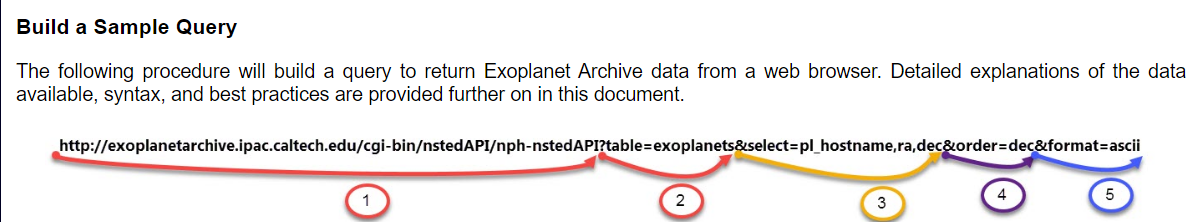

In [9]:
#Impror our confirmed planets from the Caltech API.
conf_plan = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_bmassj,pl_orbper"



Our API request allows us to pull only the data we need from Caltechs archive of NASA data. For this scenario we are pulling the planets name for our own personal use. It will help us keep things organized. The planets mass for our first reaserch question and the the planets orbital periods in earth days for our second reaserch question. We will then convert all our data into a Dataframe.

In [10]:
#Read our confirmed planets into a pnadas datframe
df2 = pd.read_csv(conf_plan)
#Show the results
df2.head()

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.690,410.100010
1,HD 177830 c,0.150,110.900000
2,HD 178911 B b,8.030,71.484000
3,HD 179079 b,0.081,14.479000
4,HD 179949 b,0.916,3.092514


We need a statitistical overview of the data. So we will be generating some summary statistics, including the shape, data type, description, and information.

In [11]:
#Show the shape of the data
df2.shape

(4324, 3)

In [12]:
#Show the type of the data
df2.dtypes

pl_name       object
pl_bmassj    float64
pl_orbper    float64
dtype: object

In [13]:
#Show the description of the data
df2.describe()

,pl_bmassj,pl_orbper
count,1806.000000,4.180000e+03
mean,2.404317,2.060520e+03
std,4.371368,1.129482e+05
min,0.000060,9.070629e-02
25%,0.067413,4.465547e+00
50%,0.790000,1.176103e+01
75%,2.430000,4.169784e+01
max,55.590000,7.300000e+06


In [14]:
#Show the information of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_name    4324 non-null   object 
 1   pl_bmassj  1806 non-null   float64
 2   pl_orbper  4180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 101.5+ KB


AS we an see from the information above the minimum mass reorded is 0.000060. This answers one part of our reaserch question. This is relativley comparable to the 0.000039 mass of earths moon, at just 30% more massive. This means the keeplar space teleseope can locate planets that are just 30% larger than earths moon.

We could speulate that the smaller planets that were located happened to be the ones that were loser to earth. This however is outside the scope of our analysis.

Another intresting thing to note from our summary statistics is that we are missing signifigant amounts of data from our pl_bmassj column and the pl_orber coloumn.

We will need to do a Foreward Fill to flush out our data apropriatley. But ween need to make sure the distribution of the data reamins unchanged by our foreward fill as this is important for our analysis. We shall be using a histogram for this purpose.

(array([781., 261., 168., 107.,  91.,  53.,  38.,  33.,  23.,  20.,  24.,
         11.,  16.,  17.,  11.,  15.,  11.,  17.,  10.,  10.,   5.,   2.,
          7.,   7.,   7.,   8.,   4.,   2.,   6.,   2.,   4.,   0.,   2.,
          3.,   2.,   2.,   4.,   3.,   2.,   5.,   0.,   1.,   1.,   1.,
          2.,   0.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([6.00000000e-05, 5.55959400e-01, 1.11185880e+00, 1.66775820e+00,
        2.22365760e+00, 2.77955700e+00, 3.33545640e+00, 3.89135580e+00,
        4.44725520e+00, 5.00315460e+00, 5.55905400e+00, 6.11495340e+00,
        6.67085280e+00, 7.22675220e+00, 7.78265160e+00, 8.33855100e+00,
        8.89445040e+00, 9.4503

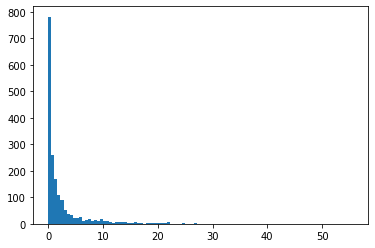

In [15]:
#Show a histogram of the mass of the confrmed planets data
plt.hist(df2['pl_bmassj'],bins=100)

In [16]:
#Use Foreward fill to fill in our missing values
df2=df2.ffill(axis = 0)
#Show the result
df2

,pl_name,pl_bmassj,pl_orbper
0,HD 177830 b,1.69000,410.100010
1,HD 177830 c,0.15000,110.900000
2,HD 178911 B b,8.03000,71.484000
3,HD 179079 b,0.08100,14.479000
4,HD 179949 b,0.91600,3.092514
...,...,...,...
4319,HR 858 b,13.00000,3.585990
4320,HR 858 c,13.00000,5.972930
4321,HR 858 d,13.00000,11.230000
4322,K2-146 c,0.02358,4.004980


Now that we have done a foreward fill we will need another histogram to confirm that the distribution of the data remains intact.As we can see larger plaets tend to form a long tail of outliers compared to smaller less massive planets. There is certaintly some amount of bias in the data here. It there is some bias towards planets with masses between 1 and 10 Jupiter mass units. 

(array([2.06e+03, 5.30e+02, 4.37e+02, 2.33e+02, 2.23e+02, 7.80e+01,
        1.80e+02, 8.80e+01, 2.50e+01, 8.00e+01, 2.40e+01, 1.20e+01,
        2.60e+01, 2.20e+01, 2.90e+01, 1.01e+02, 1.10e+01, 2.00e+01,
        2.90e+01, 1.00e+01, 5.00e+00, 2.00e+00, 7.00e+00, 1.30e+01,
        1.20e+01, 1.00e+01, 4.00e+00, 2.00e+00, 7.00e+00, 2.00e+00,
        4.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 2.00e+00, 3.00e+00,
        4.00e+00, 3.00e+00, 2.00e+00, 5.00e+00, 0.00e+00, 1.00e+00,
        3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

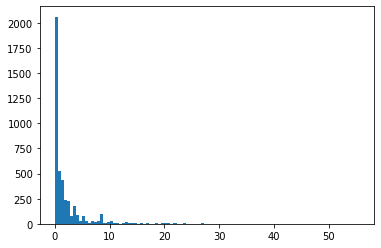

In [17]:
#Show a histogram of the mass of the confirmed planets dat again to confrim the spread of the data has remained intact.
plt.hist(df2['pl_bmassj'],bins=100)

This is the same histogram run on the data of our soalr system. It is less informative and less complete due to th limmit of the data we are working with. Still we can confirm the general distribution of the masses of our solar system. 

(array([8., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([7.86576598e-06, 1.00007079e-01, 2.00006293e-01, 3.00005506e-01,
        4.00004719e-01, 5.00003933e-01, 6.00003146e-01, 7.00002360e-01,
        8.00001573e-01, 9.00000787e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

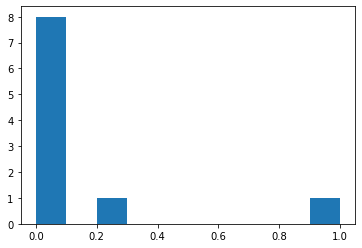

In [18]:
#Show a histogram of the mass of the planets from our solar system
plt.hist(df['mass'],bins=10)

This swarmplot and boxplot show that our hypothessis is correct. Most of the planets are between 1 and 10 jupiter masses. we should note that the planets in our solar system are signifigantly smaller than the the large proportion of confirmed planets. This is an intresting quirk of the data that indicates that Kepler has found far fewer planets that are more than 10 times more massive than jupiter when compared to the ammount it has found that are smaller than 10 jupiter mass units.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


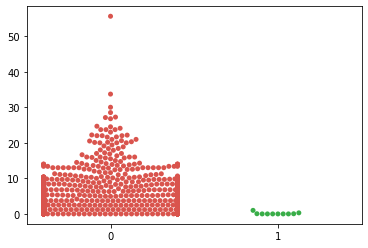

In [21]:
#Show a swarmplot of the mass of our solar sytem vs the mass of Kepler confirmed planets.
sns.swarmplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])



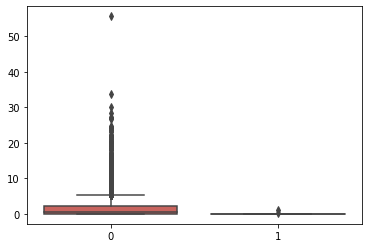

In [76]:
#Show a boxplot of the mass of our solar sytem vs the mass of Kepler confirmed planets.
sns.boxplot(
    data=[df2['pl_bmassj'], df['mass']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]])



**Approach**

Aproach: For reasech question 2:  I will be comparing the orbital period in day of the Kepler Confirmed Panets Table and the Kepler Objects of Intrest Table. For the feature we did not cover in class, I will use linear regressors from the sci-kit learn to help better predict the relationship between these variables. I will also be doing train test split so that my linear regressor can be verified on a test sample of the data. 

We import our Keplar Objects of intrest Table as a csv and read it into a dataframe. Then we gather the apropriate summary statistics for our data.

In [19]:
#Retrieve the Kepler Objects of Intrest data as a csv.
Obj_intrest = "https://raw.githubusercontent.com/Danjstr/AIM-5001/master/cumulative.csv"
#Read the data into a dataframe
df1 = pd.read_csv(Obj_intrest)
#Show the results
df1.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [21]:
#Show the information of the datframe
df1.info

<bound method DataFrame.info of       rowid     kepid kepoi_name  ...         ra        dec koi_kepmag
0         1  10797460  K00752.01  ...  291.93423  48.141651     15.347
1         2  10797460  K00752.02  ...  291.93423  48.141651     15.347
2         3  10811496  K00753.01  ...  297.00482  48.134129     15.436
3         4  10848459  K00754.01  ...  285.53461  48.285210     15.597
4         5  10854555  K00755.01  ...  288.75488  48.226200     15.509
...     ...       ...        ...  ...        ...        ...        ...
9559   9560  10031643  K07984.01  ...  298.74921  46.973351     14.478
9560   9561  10090151  K07985.01  ...  297.18875  47.093819     14.082
9561   9562  10128825  K07986.01  ...  286.50937  47.163219     14.757
9562   9563  10147276  K07987.01  ...  294.16489  47.176281     15.385
9563   9564  10156110  K07989.01  ...  297.00977  47.121021     14.826

[9564 rows x 50 columns]>

In [22]:
#Show the data types of the datframe
df1.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

We can see we have a lot of unessecary columns that have no real value for our reaserch question. We will need to drop them.

In [23]:
#Drop unnessecary columns
df3=df1.drop(columns=['koi_tce_delivname','koi_pdisposition','rowid', 'kepid','kepoi_name' ])

In [24]:
#Show the results
df3

,kepler_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,Kepler-227 b,CONFIRMED,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,Kepler-227 c,CONFIRMED,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,NaN,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,NaN,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,Kepler-664 b,CONFIRMED,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,NaN,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,NaN,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,NaN,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [25]:
#Drop all columns except 'kepler_name','koi_disposition','koi_period'
df4=df3.drop(df3.columns.difference(['kepler_name','koi_disposition','koi_period']), 1, inplace=False)

We kept Kepler name for our own convinence. While Koi_disposition and koi_period are nesscary for our anylsis.

In [26]:
#Show the results
df4

,kepler_name,koi_disposition,koi_period
0,Kepler-227 b,CONFIRMED,9.488036
1,Kepler-227 c,CONFIRMED,54.418383
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
4,Kepler-664 b,CONFIRMED,2.525592
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


Get the information on our newly modified dataframe.

In [27]:
#Show the information of the dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kepler_name      2294 non-null   object 
 1   koi_disposition  9564 non-null   object 
 2   koi_period       9564 non-null   float64
dtypes: float64(1), object(2)
memory usage: 224.3+ KB


Remove any confirmed planet data from our Keplere Object of Intrest Table. It is not nesscary as we have the confirmed planet data in the a seperate table.

In [28]:
#Remove confirmed planet data from the dataframe
df5=df4[df4.koi_disposition != 'CONFIRMED']
#Show the results
df5

,kepler_name,koi_disposition,koi_period
2,NaN,FALSE POSITIVE,19.899140
3,NaN,FALSE POSITIVE,1.736952
8,NaN,FALSE POSITIVE,7.361790
14,NaN,FALSE POSITIVE,11.521446
15,NaN,FALSE POSITIVE,19.403938
...,...,...,...
9559,NaN,FALSE POSITIVE,8.589871
9560,NaN,FALSE POSITIVE,0.527699
9561,NaN,CANDIDATE,1.739849
9562,NaN,FALSE POSITIVE,0.681402


We have removed the confirmed planets from the objects of intrest. This means we can also remove our last two columns so we only have our orbital data for non-confirmed planets.

In [29]:
#Drop the 'kepler_name','koi_disposition' tables as we now have orbital data for our non_confirmed planets
df5=df5.drop(columns=['kepler_name','koi_disposition'])
#Show the results
df5

,koi_period
2,19.899140
3,1.736952
8,7.361790
14,11.521446
15,19.403938
...,...
9559,8.589871
9560,0.527699
9561,1.739849
9562,0.681402


Reset the index just so we can keep things clean.

In [30]:
#Reset the index
df5=df5.reset_index(drop=True)
#Show the results
df5

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


Now we need the orbital data of the Confirmed Planets Table. We shall drop all unessecary columns form the confirmed plaets table and save it as df6.

In [31]:
#Drop planet name and mass from the confirmed planets table
df6=df2.drop(columns=['pl_name',	'pl_bmassj'])
#Show the results
df6

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
4319,3.585990
4320,5.972930
4321,11.230000
4322,4.004980


Our Kepler Objects of intrest table has 7271 diffrent objects in it. While our confirmed planets only has 4323 diffrent objects in it. This willc ause difficulty for our linear regression. As we need them to have the same amount of values for things to run smoothly.

The bellow code takes a list of our data adds it back into our datframe. The range is 2947 because that is the difrence between our two dataframes. Effectivley we are duplicating our confirmed planet data to match the number of values in the objects of intrest table.

This is done so that we don't want have to throw out any data from our objects of intrest table.

In [32]:
#Duplicate the data so that both dataframes have the same number of values
df9=df6.reindex(df6.index.tolist() + list(range(2947)))
#Show the results
df9

,pl_orbper
0,4.101000e+02
1,1.109000e+02
2,7.148400e+01
3,1.447900e+01
4,3.092514e+00
...,...
2942,1.689868e+00
2943,3.979100e+00
2944,3.677240e+00
2945,7.300000e+06


Confirm that none of the new rows of our Confirmed Planets Table is empty.

In [33]:
#Make sure that none of the new rows are null.
df9.isnull().value_counts()

pl_orbper
False        7271
dtype: int64

Reindex the data to clean it up.

In [34]:
#Reindex the dataframe
df9=df9.reset_index(drop=True)
#Show the results
df9

,pl_orbper
0,4.101000e+02
1,1.109000e+02
2,7.148400e+01
3,1.447900e+01
4,3.092514e+00
...,...
7266,1.689868e+00
7267,3.979100e+00
7268,3.677240e+00
7269,7.300000e+06


In this scenario we seem to have a singular extreme outlier well beyond the rest of our data points. We will need to remove it before we proceed.

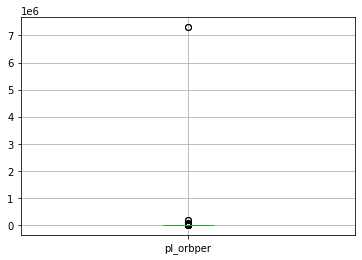

In [35]:
#Show a boxplot of the confrimed planets orbits
df9.boxplot()

We will just be removing the maximum value in the dataframe as it seems to be our only outlier.

In [36]:
#Show the maximum value of the confirmed planets orbits
df9.max()

pl_orbper    7300000.0
dtype: float64

In [37]:
#Remove the maximum value of the confrimed planets orbit
df10 = df9[df9.pl_orbper <= 7200000.0]
#Show the results
df10

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
7265,1.432475
7266,1.689868
7267,3.979100
7268,3.677240


We have the same problem with our Kepler objects of intrest data. We will need to drop the most extreme outlier before proceeding.

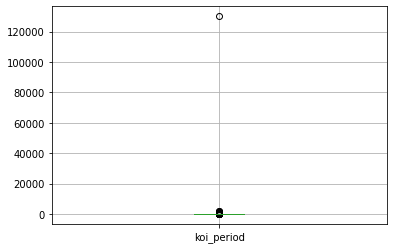

In [38]:
#Show a boxplot of the Kepler Object of Intrest orbits
df5.boxplot()

In [39]:
#Show the maximum value of the Kepler Object of Intrest orbits
df5.max()

koi_period    129995.7784
dtype: float64

In [40]:
#Remove the maximum value of the Kepler Object of Intrest orbit
df5 = df5[df5.koi_period <= 129994.7784]
#Show the results
df5

,koi_period
0,19.899140
1,1.736952
2,7.361790
3,11.521446
4,19.403938
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


We have a new problem now. The kepler confirmed planets datframe has lost two of its values, while the objects of intrst dataframe hasonly lost one. This means our dataframes are no longer the same leangth. This will present problems for our linear regression. So we will be removing a sing value form the Keplar objects of intrest dataframe to ensure that bothe datframes have the same leangth.

In [41]:
#Remove 1 value from the Kepler Object of Intrest orbits
df5 = df5.iloc[1:]
#Show the results
df5

,koi_period
1,1.736952
2,7.361790
3,11.521446
4,19.403938
5,19.221389
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


Turn both our datframes into arrays and being the process of makeing our linear regression.

In [42]:
#Convert Kepler Confirmed Planets obital data into an array
df10_array=df10.to_numpy()

In [43]:
#Convert Kepler Object of Intrest obital data into an array
df5_array=df5.to_numpy()

Create a train test split of the data. Save LinearRegression as model. Reshape our x_train and X_test data, fit the traing data to our linear regression, create y_pred for both the traing anf the test data. Then plot the results.

In [44]:
#Create a train test split of the orbital data
x_train,x_test,y_train,y_test = train_test_split(df5_array, df10_array, random_state=1)

In [45]:
#Create the variable model for the orbital data and make it a logistic Linear Regression model
model = LinearRegression()


In [46]:
#Reshape the X variables traing data
x_train=x_train.reshape(-1,1)
#Reshape the X variables test Data
x_test=x_test.reshape(-1,1)


In [47]:
#Fit the traning data to the Linear Regression
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#Create y_pred for the training data
y_pred_train=model.predict(x_train)
#Create y_pred for the test data
y_pred_test=model.predict(x_test)

This looks wrong at a glance. A regression line should not look like this. Fourtunatley, we know that Nasa tracks orbits using the transit method.This means they track orbits by looking at dips in light as a planet passes between us and it's host star. We know kepler has only been operatinal for a few year, and NASA likley needs to see multiple transits from the same object to confirm it orbital peroids. 
From this we can derive a simple fact. Nasa's Kepler space telescope is biased to finding objects that orbit there host stars faster. This can explain the odd result of our flat linear regression line. As most of the data is concentrated at the bottom.


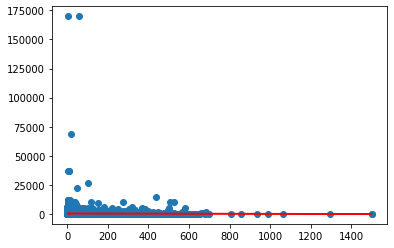

In [49]:
#Show the results as a linear regression scatter plot
plt.scatter(x_train,y_train)
#Make sure the color of our line is red
plt.plot(x_train,y_pred_train, color='red')

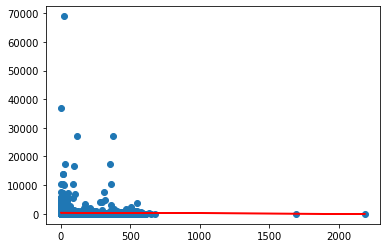

In [50]:
#Show the results as a linear regression scatter plot
plt.scatter(x_test,y_test)
#Make sure the color of our line is red
plt.plot(x_test,y_pred_test, color='red')

We will need to confirm this be redoing our linear regression from scratch. This time we will limmit our orbital period to just 2000 days.if we are correct we should be seeing at least a modest improvment in our linear regression plot. At the very least our line should not be completley flat.

In [55]:
#Remove all orbital data over 2000 days
df11 = df10[df10.pl_orbper <= 2000.0]
#Show the results
df11

,pl_orbper
0,410.100010
1,110.900000
2,71.484000
3,14.479000
4,3.092514
...,...
7265,1.432475
7266,1.689868
7267,3.979100
7268,3.677240


In [58]:
#Remove all orbital data over 2000 days
df12 = df5[df5.koi_period <= 2000.0]
#Show the results
df12

,koi_period
1,1.736952
2,7.361790
3,11.521446
4,19.403938
5,19.221389
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


The Kepler Objects of Intrest Table has more values than the Confirmed planets table. we will need to remove a few data poins to make sure both are the same leangth for our linear regresssion.

In [59]:
#Remove values from Kepler Objects of intrest orbits to make sure both datframes have the same leangth
df12 = df12.iloc[252:]
#Show the results
df12

,koi_period
254,8.387210
255,15.238454
256,0.413334
257,0.933746
258,6.471793
...,...
7266,8.589871
7267,0.527699
7268,1.739849
7269,0.681402


Reset both indexes.

In [61]:
#Reset the index of the Kepler Objects of intrest orbits
df12.reset_index()

,index,koi_period
0,254,8.387210
1,255,15.238454
2,256,0.413334
3,257,0.933746
4,258,6.471793
...,...,...
7011,7266,8.589871
7012,7267,0.527699
7013,7268,1.739849
7014,7269,0.681402


In [62]:
#Reset the index of the Kepler Confrimed Planets orbits
df11.reset_index()

,index,pl_orbper
0,0,410.100010
1,1,110.900000
2,2,71.484000
3,3,14.479000
4,4,3.092514
...,...,...
7011,7265,1.432475
7012,7266,1.689868
7013,7267,3.979100
7014,7268,3.677240


The histograms and box plots show us we still have a bit of a tail but it should serve to show that our linear regression does infact look less flat when viewed on a more apropriate scale.
I should note I chose 2000 because 2000 days is roughly 5 and a half years. This means Nasa could confirm the orbit of any such objects much more easily. As they only have to make a few transits of theire host star in that window of time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d81b0e2e8>]],
      dtype=object)

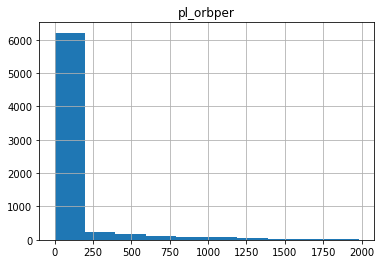

In [63]:
#Show the spread of the Confrimed Planets orbits using a histogram
df11.hist()

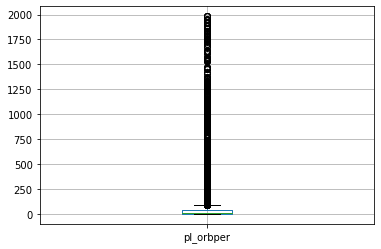

In [78]:
#Show the spread of the Confrimed Planets orbits using a boxplot
df11.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d818e3860>]],
      dtype=object)

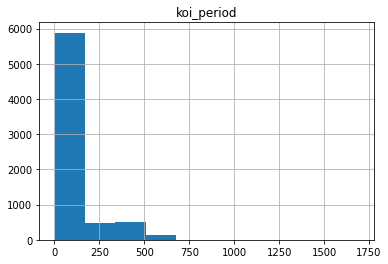

In [67]:
#Show the spread of the Kepler Object of Intrest orbits using a histogram
df12.hist()

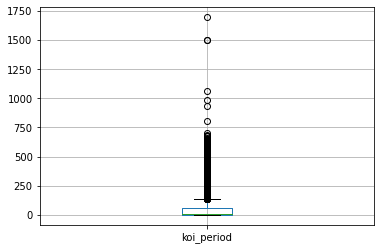

In [77]:
#Show the spread of the #Show the spread of the Kepler Object of Intrest orbits using a boxplot
df12.boxplot()

Again, fit  the dataframes to arrays and follow the same training process as outlined above using train test split.Then We plot the results.

In [68]:
#Turn the Keplere Objects of Intrest orbits dataframe into an array
df12_array=df12.to_numpy()

In [69]:
#Turn the Confrimed Planets orbits dataframe into an array
df11_array=df11.to_numpy()

Create a train test split of the Odor dummies and the poisoned column.

In [70]:
#Create a train test split of the data
x_train,x_test,y_train,y_test = train_test_split(df11_array, df12_array, random_state=1)

Create a model for the oder data and make it a logistic regression. Fit the model on our training data and run it.

In [79]:
#Create the variable model for the orbital data and make it a logistic Linear Regression model
model = LinearRegression()


In [80]:
#Reshape the X variables traing data
x_train=x_train.reshape(-1,1)
#Reshape the X variables test Data
x_test=x_test.reshape(-1,1)


In [81]:
#Fit the traning data to the Linear Regression
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#Create y_pred for the training data
y_pred_train=model.predict(x_train)
#Create y_pred for the test data
y_pred_test=model.predict(x_test)

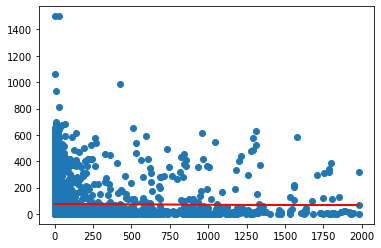

In [83]:
#Show the results as a linear regression scatter plot
plt.scatter(x_train,y_train)
#Make sure the color of our line is red
plt.plot(x_train,y_pred_train, color='red')

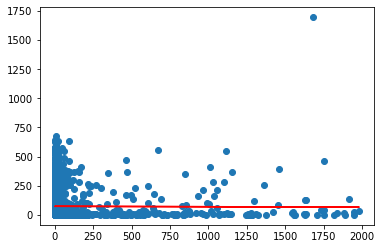

In [84]:
#Show the results as a linear regression scatter plot
plt.scatter(x_test,y_test)
#Make sure the color of our line is red
plt.plot(x_test,y_pred_test, color='red')

Good, It seems our linear regression is much more clear now. Still we can see that most our orbiting bodies have orbits smaller than 200 days. This confirms the limmitations of the Keplers space telescopes ability to provide data on orbiting bodies with longer orbital periods.